# Random Forests
---------

In [2]:
# We learened
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor

# Now learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [3]:
BaggingClassifier?

Init signature:
BaggingClassifier(
    base_estimator=None,
    n_estimators=10,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
)
Docstring:     
A Bagging classifier.

A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random
subsets of the dataset are drawn as random subsets of the samples, then
this algorithm is known as Pasting [1]_. If samples are drawn with
replacement

In [4]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators='warn',
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

    .. v

- Base estimator: Decision Tree
- Each estimator is trained on a different bootstrap sample having the same size as the training set(this we are aware of it,it is same as Bagging alogorithm)
- RF introduces further randomization on **features** in the training of individual trees
- d features are sampled at each node **without** replacement( d < total number of features )

# Random Forests: Training
![image.png](https://github.com/rritec/datahexa/blob/master/images/ml/ml_random_forest1.png?raw=true)

# Random Forests: Prediction
![image.png](https://github.com/rritec/datahexa/blob/master/images/ml/ml_random_forest2.png?raw=true)

- Random Forests: Classification & Regression
    - Classification:
        - Aggregates predictions by `majority voting`
        - RandomForestClassifier in scikit-learn
    - Regression:
        - Aggregates predictions through `averaging`
        - RandomForestRegressor in scikit-learn

# Exercise : Use Random Forest on auto dataset
- Find mpg based on different features like hp,disp..etc
- it is regression problem

# Step 1: Import Required Modules

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor # nbase_estimator
from sklearn.ensemble import  RandomForestRegressor # Meta estimator
from sklearn.metrics import mean_squared_error as MSE

In [5]:
RandomForestRegressor?

# Step 2: Import Data

In [2]:
os.chdir("C:\\Users\\ramreddymyla\\Google Drive\\01 DS ML DL NLP and AI With Python Lab Copy\\02 Lab Data\\Python")
df = pd.read_csv("auto-mpg.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
mpg       392 non-null float64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
size      392 non-null float64
dtypes: float64(4), int64(2)
memory usage: 18.5 KB


In [3]:
X = df.loc[:,df.columns !="mpg"]

In [4]:
y= df["mpg"]

In [5]:
type(X)

pandas.core.frame.DataFrame

In [6]:
type(y)

pandas.core.series.Series

In [7]:
X[3:6]

,displ,hp,weight,accel,size
3,250.0,98,3525,19.0,15.0
4,97.0,78,2188,15.8,10.0
5,119.0,100,2615,14.8,10.0


In [8]:
y[3:6]

3    18.5
4    34.3
5    32.9
Name: mpg, dtype: float64

# Step 3: Split Data

In [12]:
# Set SEED for reproducibility
SEED = 1
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=SEED)
# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, 
                           min_samples_leaf=0.26, 
                           random_state=SEED)
# Instantiate a random forests rf
rf = RandomForestRegressor(n_estimators=400
                           ,min_samples_leaf=0.12,
                           random_state=SEED)

In [16]:
RandomForestRegressor?

In [17]:
RandomForestClassifier?

# Step 4: Fit dt and rf models

In [13]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.26,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [14]:
# Fit 'rf' to the training set
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.12, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

# Step 5 : predict  and calculate RMSE

In [15]:
y_pred_dt= dt.predict(X_test)

In [16]:
RMSE_test_dt = (MSE(y_test, y_pred_dt))**(1/2)
# Print acc
print('rmse of dt: {:.2f}'.format(RMSE_test_dt))

rmse of dt: 4.86


In [17]:
y_pred_rf= rf.predict(X_test)

In [18]:
RMSE_test_rf = (MSE(y_test, y_pred_rf))**(1/2)
# Print acc
print('rmse of  rf: {:.2f}'.format(RMSE_test_rf))

rmse of  rf: 3.98


**Which alogorithm is good on this data set ?**

<input type="radio" disabled> DecisionTreeRegressor

<input type="radio" disabled checked> RandomForest Regressor

# Feature Importance
- Tree-based methods: enable measuring the importance of each feature in prediction.
- In sklearn:
    - how much the tree nodes use a particular feature (weighted average) to reduce impurity
    - accessed using the attribute **feature\_importance_**

In [54]:
rf.feature_importances_

array([4.02239700e-01, 1.67549565e-01, 1.88745271e-01, 2.43724032e-05,
       2.41441092e-01])

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,index = X.columns)

In [56]:
importances_rf

displ     0.402240
hp        0.167550
weight    0.188745
accel     0.000024
size      0.241441
dtype: float64

In [57]:
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

In [58]:
sorted_importances_rf

accel     0.000024
hp        0.167550
weight    0.188745
size      0.241441
displ     0.402240
dtype: float64

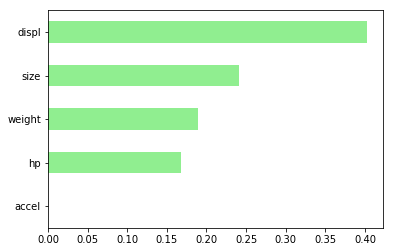

In [59]:
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh',
                           color='lightgreen'); 
plt.show()

In [22]:
rf.base_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [23]:
rf.max_features

'auto'

In [24]:
rf.feature_importances_

array([4.02239700e-01, 1.67549565e-01, 1.88745271e-01, 2.43724032e-05,
       2.41441092e-01])